In [1]:
import sys

In [2]:
!{sys.executable} -m pip install -r requirements.txt

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


In [15]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [23]:
!wget https://www.shutterstock.com/image-vector/vinnytsia-ukraine-may-12-2023-600nw-2302113209.jpg -O bbc.jpg

--2025-07-18 20:38:48--  https://www.shutterstock.com/image-vector/vinnytsia-ukraine-may-12-2023-600nw-2302113209.jpg
Resolving www.shutterstock.com (www.shutterstock.com)... 108.158.245.45, 108.158.245.69, 108.158.245.7, ...
Connecting to www.shutterstock.com (www.shutterstock.com)|108.158.245.45|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25420 (25K) [image/jpeg]
Saving to: ‘bbc.jpg’

bbc.jpg             100%[===================>]  24.82K  --.-KB/s    in 0s      

2025-07-18 20:38:48 (211 MB/s) - ‘bbc.jpg’ saved [25420/25420]



(300, 600)

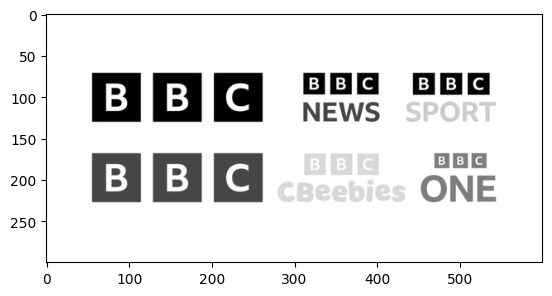

In [83]:
img = cv2.imread("assets/bbc.jpg", cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
img.shape

In [ ]:
# Sobel operator in x-direction to get the horizontal edges
I_x = cv2.Sobel(img, ddepth=cv2.CV_32F, dx=1, dy=0)
# Sobel operator in y-direction to get the vertical edges
I_y = cv2.Sobel(img, ddepth=cv2.CV_32F, dx=0, dy=1)
I_x.shape, I_y.shape

((300, 600), (300, 600))

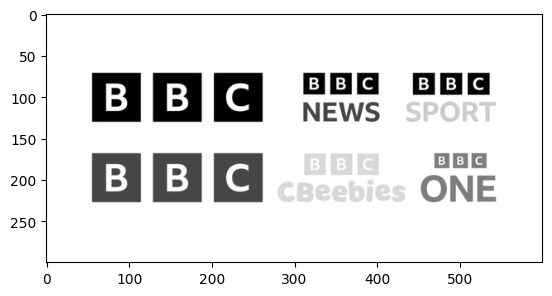

In [85]:
plt.imshow(img, cmap='gray')

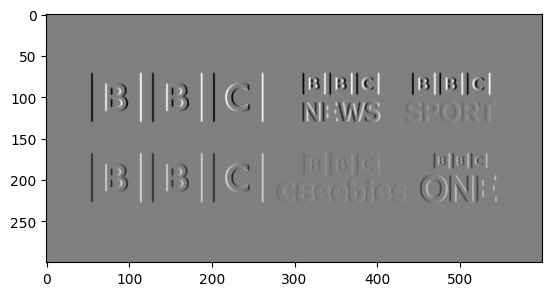

In [100]:
plt.imshow(I_x, cmap='gray')

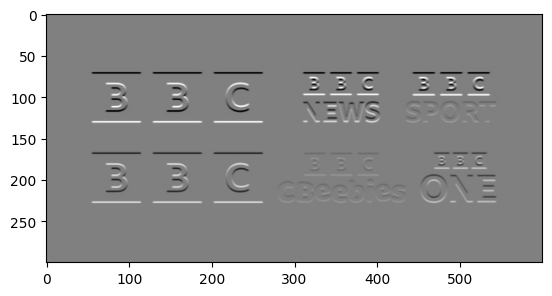

In [101]:
plt.imshow(I_y, cmap='gray')

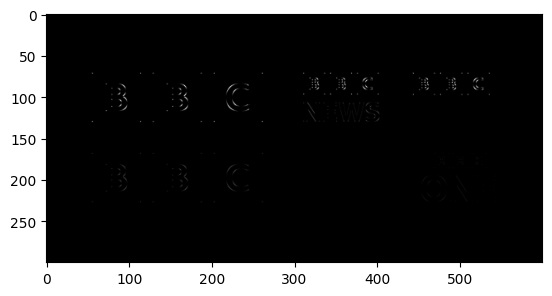

In [102]:
# we expect to see both corners AND edges, but only want corners
plt.imshow(I_x**2 * I_y**2, cmap='gray')

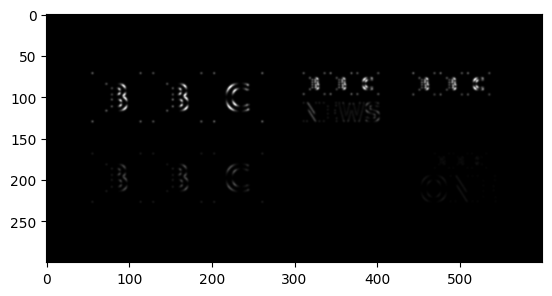

In [ ]:
# blurring the convolution of squared I_x and squared I_y intensifies the edges
squared_grad_conv = cv2.GaussianBlur(I_x**2 * I_y**2, ksize=(0,0), sigmaX=1)
plt.imshow(squared_grad_conv, cmap='gray')

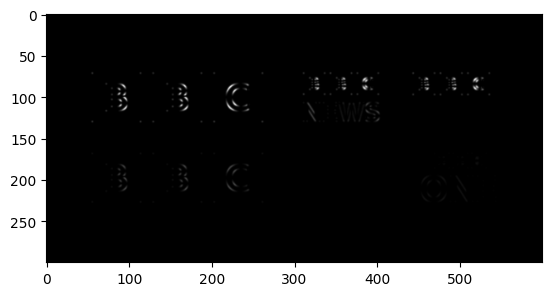

In [ ]:
# squaring the blurred convolution of I_x and I_y would blur edge intensity then square
corners_supressed_squared = cv2.GaussianBlur(I_x * I_y, ksize=(0,0), sigmaX=1) ** 2
plt.imshow(corners_supressed_squared, cmap='gray')

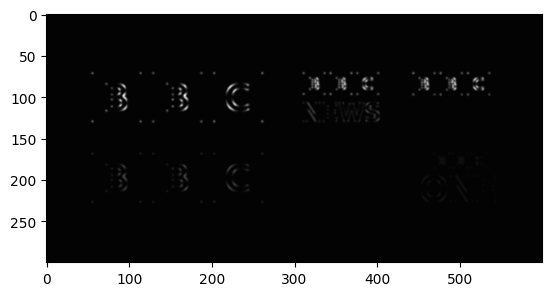

In [ ]:
squared_grad_conv_minus_corners_supressed_squared = cv2.GaussianBlur(I_x**2 * I_y**2 - corners_supressed_squared, ksize=(0,0), sigmaX=1)
# but this does not blur the edges in I_x**2 and I_y**2 before their convolution
plt.imshow(squared_grad_conv_minus_corners_supressed_squared, cmap='gray')

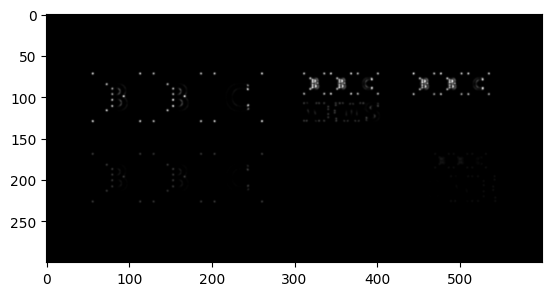

In [118]:
I_x_squared_blur = cv2.GaussianBlur(I_x**2, ksize=(0,0), sigmaX=1)
I_y_squared_blur = cv2.GaussianBlur(I_y**2, ksize=(0,0), sigmaX=1)

corners = I_x_squared_blur * I_y_squared_blur - corners_supressed_squared
plt.imshow(corners, cmap='gray')

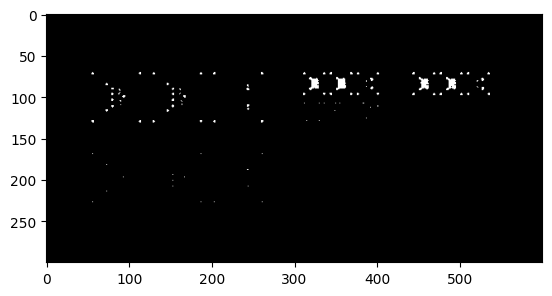

In [120]:
# apply threshold so any pixel below max/5 has 0 intensity
corners[corners < corners.max() / 5] = 0
# make the remaining pixels the brightest they can be
corners[corners != 0] = 255

plt.imshow(corners, cmap='gray')

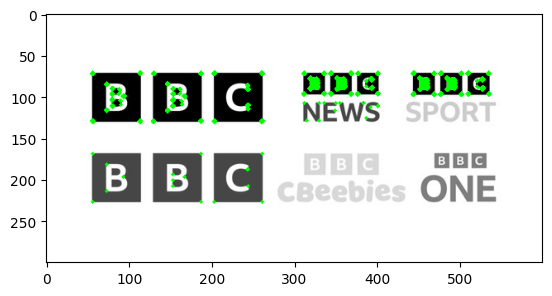

In [ ]:
new_img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

# place colored corners where they belond on original image
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if corners[i][j] == 255:
            cv2.circle(new_img, (j, i), radius=2, color=(0, 255, 0), thickness=-1)

plt.imshow(new_img, cmap="gray")

In [ ]:
S_x = cv2.Scharr(img, ddepth=cv2.CV_32F, dx=1, dy=0)
S_y = cv2.Scharr(img, ddepth=cv2.CV_32F, dx=0, dy=1)

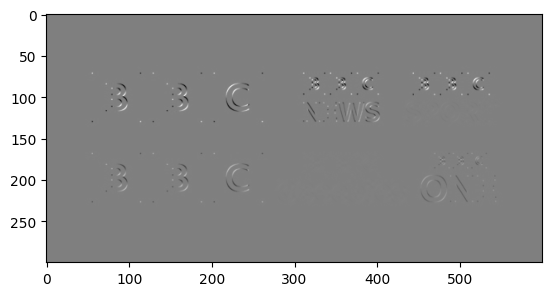

In [98]:
plt.imshow(S_x, cmap='gray')
plt.imshow(S_y, cmap='gray')
plt.imshow(S_x * S_y, cmap='gray')